In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# constants
k_b = 1.381e-23

In [3]:
# Directory containing CSV files
directory = 'task5_data/'

# List to store DataFrames
dfs = []

# Loop through each CSV file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Read the CSV file into a DataFrame and append it to the list
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Group the DataFrame by the 'beta' column
grouped_df = combined_df.groupby('beta')

# Create an empty dictionary to store the arrays
beta_arrays = {}

# Iterate over the groups
for beta, group in grouped_df:
    # Store the group as an array in the dictionary
    beta_arrays[beta] = group.to_numpy()


In [8]:
len(beta_arrays[0.2])

1020

In [10]:
print(beta_arrays[0.2])

[[ 0.0000e+00  2.0000e-01  1.0000e+00 ...  1.0000e+00  0.0000e+00
   3.0000e+00]
 [ 1.0000e+00  2.0000e-01  6.2875e-01 ...  3.8500e-01  0.0000e+00
   3.0000e+00]
 [ 2.0000e+00  2.0000e-01  4.0000e-01 ...  1.4750e-01  0.0000e+00
   3.0000e+00]
 ...
 [ 4.8000e+01  2.0000e-01 -8.0000e-02 ... -2.7500e-02  0.0000e+00
   8.0000e+00]
 [ 4.9000e+01  2.0000e-01  1.8750e-02 ...  2.5000e-03  0.0000e+00
   8.0000e+00]
 [ 5.0000e+01  2.0000e-01 -2.8750e-02 ... -3.5000e-02  0.0000e+00
   8.0000e+00]]


KeyboardInterrupt: 

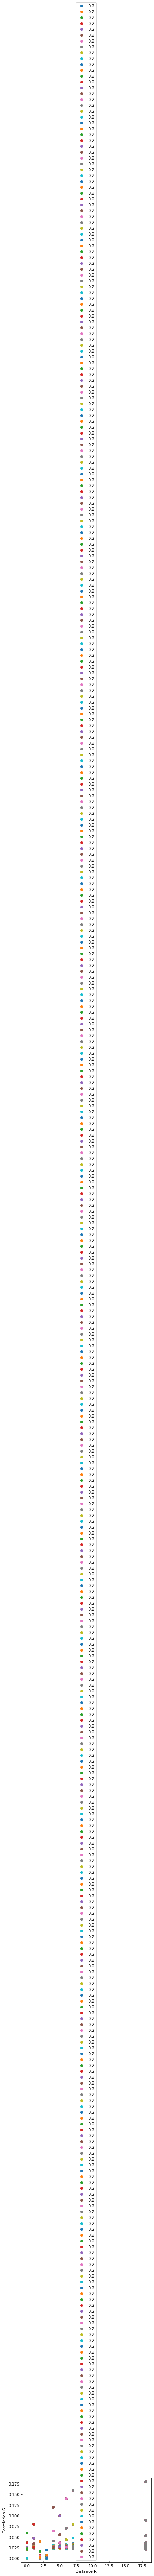

In [5]:
# task 5

for beta, array in beta_arrays.items():
    
    
    r_correlation = np.zeros(51)
    G = np.zeros(51)
    
    for i in range(len(array)):
        
        # idk what this does
        j = int(array[i][0])
        
        # r_correlation is stored in the 6th column (starts count from 0)
        r_correlation[j] = array[i][6]   
        
        # G is stored in 4th column 
        G[j] += array[i][4] / 50
        
        # plt.errorbar(independentVar, dependantVar, yerr=value_errors, fmt='o', capsize=3, label=beta)
        
        plt.plot(r_correlation, G, marker='o', label=beta, linestyle='')
        
        
        plt.legend()
        # Set tick parameters inwards
        plt.tick_params(axis='both', direction='in')
        plt.xlabel("Distance R")
        # plt.xlim(0, sweepRang)

        plt.ylabel("Correlation G")
        
    plt.show()